In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
from sklearn.linear_model import Ridge

In [2]:
energy_df = pd.read_csv('energydata_complete.csv') #загрузки .csv файла с данными в pandas
energy_df.head(10) #вывод 10 строк методом head

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.20,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.20,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.20,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.20,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.20,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.20,44.500000,19.79,44.933333,18.890000,...,17.000000,45.29,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.20,44.500000,19.79,44.900000,18.890000,...,17.000000,45.29,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.20,44.500000,19.73,44.900000,18.890000,...,17.000000,45.29,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.20,44.433333,19.73,44.790000,18.890000,...,17.000000,45.29,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.23,44.400000,19.79,44.863333,18.890000,...,17.000000,45.29,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


1. date - дата
2. Appliances - потребление энергии электроприборами
3. lights - потребление энергии световыми приборами
4. T1 - температура в кухонной зоне в градусах
5. RH_1 - влажность в кухонной зоне в %
6. T2 - температура в зоне гостинной в грудусах
7. RH_2 влажность в зоне гостинной в %
8. T3 - температура в прачечной в градусах
9. RH_3 - влажность в прачечной в %
10. T4 - температура в офисе в грдусах
11. RH_4 - влажнсоть в офисе в %
12. T5 - температура в ванной в градусах
13. RH_5 - влажность в ванной в %
14. T6 - температура снаружи здания(северная сторона) в градусах
15. RH_6 влажность снаружи здания (северная сторона) в %
16. T7 - температура в гладильной комнате в градусах
17. RH_7 - влажность в гладильной комнате в %
18. T8 - температура в детской комнате в грудусах
19. RH_8 - влажность в детской комнате в %
20. T9 - температура в комнате родителей в градусах
21. RH_9 - влажность в комнате родителей в %
22. T_out - температура снаружи (по данным метеостанции) в градусах
23. Press_mm_hg - давление снаружи в миллиметрах ртутного столба
24. RH_out - влажность снаружи( по данным метеостанции) в %
25. Windspeed - скорость ветра(по данным метеостанции) в метрах в секнду
26. Visibility - видимость( по данным метеостанции) в километрах
27. Tdewpoint - точка росы
28. rv1 - случайная переменна 1
29. rv2 - случайная перемнная 2

In [3]:
#анализ данных для ящиков
energy_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


2) Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [4]:
energy_df.shape
#размер набора данных до:

(19735, 29)

In [5]:
#yдалим дубликаты и проверим результат
energy_df = energy_df.drop_duplicates()
energy_df.shape
#размер набор аданных после:

(19735, 29)

3) Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [6]:
#выделим количественные и категориальные признаки
numerical = [i for i in energy_df.columns if energy_df[i].dtype.name != 'object']
categorial = [i for i in energy_df.columns if energy_df[i].dtype.name == 'object']
print("Numerical",numerical)
print("Categorial",categorial)

Numerical ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']
Categorial ['date']


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Appliances'),
  Text(1, 0, 'lights'),
  Text(2, 0, 'T1'),
  Text(3, 0, 'RH_1'),
  Text(4, 0, 'T2'),
  Text(5, 0, 'RH_2'),
  Text(6, 0, 'T3'),
  Text(7, 0, 'RH_3'),
  Text(8, 0, 'T4'),
  Text(9, 0, 'RH_4'),
  Text(10, 0, 'T5'),
  Text(11, 0, 'RH_5'),
  Text(12, 0, 'T6'),
  Text(13, 0, 'RH_6'),
  Text(14, 0, 'T7'),
  Text(15, 0, 'RH_7'),
  Text(16, 0, 'T8'),
  Text(17, 0, 'RH_8'),
  Text(18, 0, 'T9'),
  Text(19, 0, 'RH_9'),
  Text(20, 0, 'T_out'),
  Text(21, 0, 'Press_mm_hg'),
  Text(22, 0, 'RH_out'),
  Text(23, 0, 'Windspeed'),
  Text(24, 0, 'Visibility'),
  Text(25, 0, 'Tdewpoint'),
  Text(26, 0, 'rv1'),
  Text(27, 0, 'rv2')])

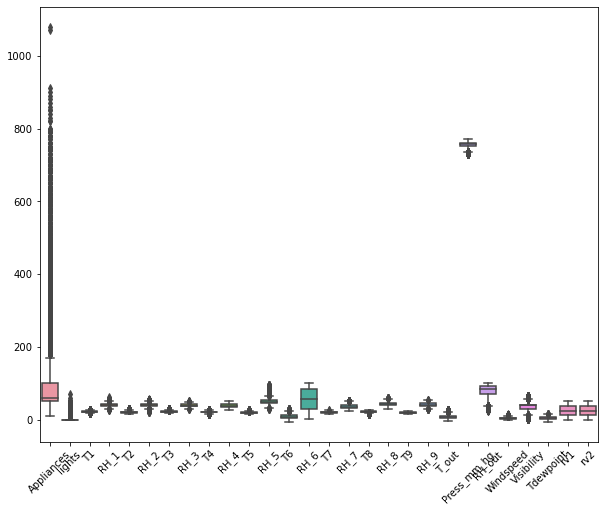

In [7]:
plt.figure(figsize=(10,8)) #получили доступ к экземпляру figure, и передали аргумент figsize. размер определяется в дюймах, а не в пикселях. В результате получится фигура размером 10 на 8 дюйма
sns.boxplot(data=energy_df[numerical]) #строим ящики для колич признаков
plt.xticks(rotation=45) #используется для вращения меток по оси x. tick - маркеры, представляющие точки данных на осях.Это массивоподобная структура, задает список местоположений xtick

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'Appliances'),
  Text(1, 0, 'lights'),
  Text(2, 0, 'T1'),
  Text(3, 0, 'RH_1'),
  Text(4, 0, 'T2'),
  Text(5, 0, 'RH_2'),
  Text(6, 0, 'T3'),
  Text(7, 0, 'RH_3'),
  Text(8, 0, 'T4'),
  Text(9, 0, 'RH_4'),
  Text(10, 0, 'T5'),
  Text(11, 0, 'RH_5'),
  Text(12, 0, 'T6'),
  Text(13, 0, 'RH_6'),
  Text(14, 0, 'T7'),
  Text(15, 0, 'RH_7'),
  Text(16, 0, 'T8'),
  Text(17, 0, 'RH_8'),
  Text(18, 0, 'T9'),
  Text(19, 0, 'RH_9'),
  Text(20, 0, 'T_out'),
  Text(21, 0, 'Press_mm_hg'),
  Text(22, 0, 'RH_out'),
  Text(23, 0, 'Windspeed'),
  Text(24, 0, 'Visibility'),
  Text(25, 0, 'Tdewpoint'),
  Text(26, 0, 'rv1'),
  Text(27, 0, 'rv2')])

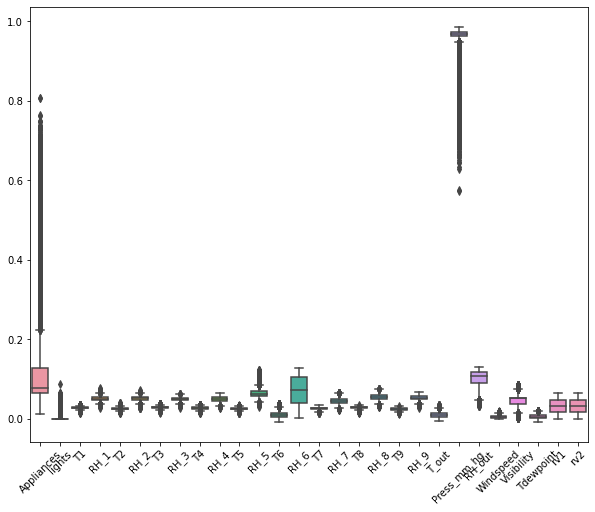

In [8]:
#используем нормализацию(значения смещ и изм чтобы находится в диап 0-1)
energy_df[numerical] = preprocessing.normalize(energy_df[numerical]) #вычитаем мин значение из каждой записи, а затем делим результат на разницy между макс значением и мин значением.
plt.figure(figsize=(10,8))
sns.boxplot(data=energy_df[numerical])
plt.xticks(rotation=45)

In [9]:
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,0.078588,0.039294,0.026052,0.062342,0.025148,0.058666,0.025921,0.058587,0.024886,...,0.022310,0.059635,0.008645,0.960735,0.120501,0.009169,0.082517,0.006942,0.017388,0.017388
1,2016-01-11 17:10:00,0.078593,0.039296,0.026054,0.061163,0.025150,0.058581,0.025923,0.058670,0.024888,...,0.022355,0.059678,0.008492,0.960929,0.120509,0.008733,0.077501,0.006811,0.024372,0.024372
2,2016-01-11 17:20:00,0.065533,0.039320,0.026069,0.060684,0.025165,0.058490,0.025938,0.058892,0.024806,...,0.022281,0.059635,0.008345,0.961632,0.120581,0.008301,0.072523,0.006684,0.037541,0.037541
3,2016-01-11 17:30:00,0.065372,0.052297,0.026005,0.060229,0.025103,0.058298,0.025874,0.058834,0.024697,...,0.022226,0.059357,0.008171,0.959392,0.120284,0.007845,0.067333,0.006537,0.059371,0.059371
4,2016-01-11 17:40:00,0.078635,0.052423,0.026068,0.060724,0.025163,0.058360,0.025936,0.058976,0.024757,...,0.022280,0.059501,0.008038,0.961839,0.120574,0.007427,0.062471,0.006422,0.013216,0.013216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,0.127920,0.000000,0.032705,0.059560,0.033119,0.053759,0.034794,0.052656,0.031596,...,0.029678,0.059854,0.029081,0.966054,0.071209,0.004264,0.030274,0.017056,0.055130,0.055130
19731,2016-05-27 17:30:00,0.115200,0.000000,0.032640,0.059520,0.032965,0.053863,0.034731,0.052766,0.031616,...,0.029696,0.059891,0.028928,0.966659,0.071680,0.004480,0.031360,0.017024,0.063082,0.063082
19732,2016-05-27 17:40:00,0.329310,0.012197,0.031102,0.056832,0.031258,0.052163,0.032992,0.050848,0.030126,...,0.028296,0.057068,0.027402,0.921093,0.068708,0.004472,0.030898,0.016181,0.035613,0.035613
19733,2016-05-27 17:50:00,0.477364,0.011366,0.028983,0.053408,0.028885,0.048914,0.030563,0.046929,0.028074,...,0.026369,0.053212,0.025384,0.858347,0.064406,0.004357,0.029741,0.015041,0.007186,0.007186


4. Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [10]:
#Так как из категориальных признаков в этом наборе данных есть только date,
#то его соответственно нет смысла преобразовывать с помощью OHE, необходимо, чтоб остался один столбец с классами, но они просто имели числовые значения, 
#Поэтому единственный логичный вариант в данном случае - LabelEncoder
labelEncoder = LabelEncoder() #LabelEncoder каждой категории сопоставляет некоторое целое число
energy_df['date'] = labelEncoder.fit_transform(energy_df['date']) #фит транс подгоняет, потом преобразует данные
energy_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0,0.078588,0.039294,0.026052,0.062342,0.025148,0.058666,0.025921,0.058587,0.024886,...,0.022310,0.059635,0.008645,0.960735,0.120501,0.009169,0.082517,0.006942,0.017388,0.017388
1,1,0.078593,0.039296,0.026054,0.061163,0.025150,0.058581,0.025923,0.058670,0.024888,...,0.022355,0.059678,0.008492,0.960929,0.120509,0.008733,0.077501,0.006811,0.024372,0.024372
2,2,0.065533,0.039320,0.026069,0.060684,0.025165,0.058490,0.025938,0.058892,0.024806,...,0.022281,0.059635,0.008345,0.961632,0.120581,0.008301,0.072523,0.006684,0.037541,0.037541
3,3,0.065372,0.052297,0.026005,0.060229,0.025103,0.058298,0.025874,0.058834,0.024697,...,0.022226,0.059357,0.008171,0.959392,0.120284,0.007845,0.067333,0.006537,0.059371,0.059371
4,4,0.078635,0.052423,0.026068,0.060724,0.025163,0.058360,0.025936,0.058976,0.024757,...,0.022280,0.059501,0.008038,0.961839,0.120574,0.007427,0.062471,0.006422,0.013216,0.013216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,19730,0.127920,0.000000,0.032705,0.059560,0.033119,0.053759,0.034794,0.052656,0.031596,...,0.029678,0.059854,0.029081,0.966054,0.071209,0.004264,0.030274,0.017056,0.055130,0.055130
19731,19731,0.115200,0.000000,0.032640,0.059520,0.032965,0.053863,0.034731,0.052766,0.031616,...,0.029696,0.059891,0.028928,0.966659,0.071680,0.004480,0.031360,0.017024,0.063082,0.063082
19732,19732,0.329310,0.012197,0.031102,0.056832,0.031258,0.052163,0.032992,0.050848,0.030126,...,0.028296,0.057068,0.027402,0.921093,0.068708,0.004472,0.030898,0.016181,0.035613,0.035613
19733,19733,0.477364,0.011366,0.028983,0.053408,0.028885,0.048914,0.030563,0.046929,0.028074,...,0.026369,0.053212,0.025384,0.858347,0.064406,0.004357,0.029741,0.015041,0.007186,0.007186


5) Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других

<AxesSubplot:>

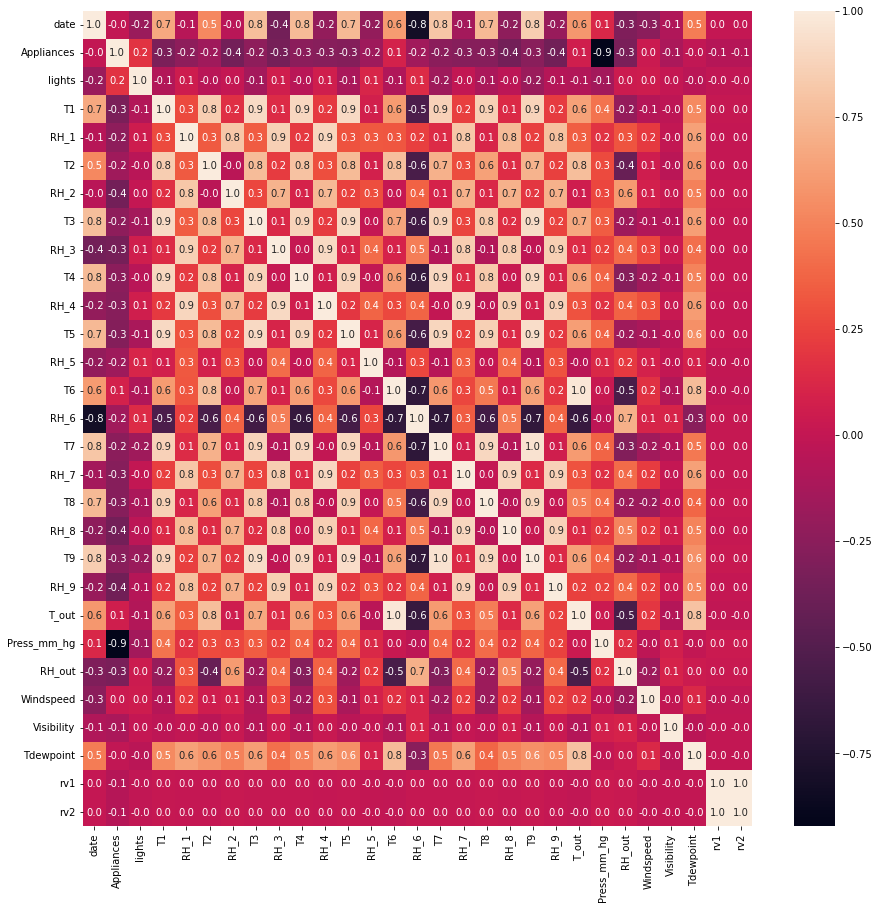

In [11]:
#Положимельный коэф корреляции - прямая зависимость между признаками
#Отрицательный коэф корреляции - обратная зависимость между признаками

energy_corr_df = energy_df.corr() #если применить .corr к наб данных, он вернет все попарные корреляции между столбцами; вот почему вы затем наблюдаете 1 по диагонали(каждый столбец идеально соотносится с самим собой)
plt.figure(figsize=(15,15))
sns.heatmap(energy_corr_df, annot=True, fmt='.1f') #аргумент фмт - 1 занак после запятой. Для более точной интерпретации необходимо добавить аргумент annot=True, который помогает отобразить коэффициент корреляции.

In [12]:
energy_corr_df

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
date,1.000000,-0.000142,-0.185275,0.663427,-0.055655,0.525942,-0.045854,0.770496,-0.358603,0.758855,...,0.848995,-0.189982,0.591600,0.118274,-0.304721,-0.250735,-0.081301,0.472148,0.007934,0.007934
Appliances,-0.000142,1.000000,0.181365,-0.316702,-0.234680,-0.156614,-0.358731,-0.237812,-0.341771,-0.251199,...,-0.260768,-0.365619,0.065608,-0.922251,-0.326296,0.033173,-0.107907,-0.006194,-0.065883,-0.065883
lights,-0.185275,0.181365,1.000000,-0.074625,0.051931,-0.047110,0.002654,-0.135312,0.061748,-0.049569,...,-0.180431,-0.060193,-0.079180,-0.142686,0.041174,0.048709,0.002834,-0.038889,-0.007535,-0.007535
T1,0.663427,-0.316702,-0.074625,1.000000,0.277219,0.849639,0.162496,0.910627,0.140816,0.897096,...,0.875221,0.212716,0.633752,0.432427,-0.203300,-0.059092,-0.028610,0.532377,0.014349,0.014349
RH_1,-0.055655,-0.234680,0.051931,0.277219,1.000000,0.333697,0.817877,0.339549,0.857707,0.210891,...,0.228482,0.784152,0.349626,0.180984,0.313254,0.204524,-0.004929,0.636189,0.008006,0.008006
T2,0.525942,-0.156614,-0.047110,0.849639,0.333697,1.000000,-0.040935,0.765817,0.213948,0.791220,...,0.719245,0.239995,0.774131,0.273880,-0.409952,0.060303,-0.042384,0.572237,0.002326,0.002326
RH_2,-0.045854,-0.358731,0.002654,0.162496,0.817877,-0.040935,1.000000,0.258060,0.717563,0.096102,...,0.191432,0.710632,0.054706,0.260350,0.606375,0.076712,0.018770,0.489483,0.018180,0.018180
T3,0.770496,-0.237812,-0.135312,0.910627,0.339549,0.765817,0.258060,1.000000,0.128418,0.877427,...,0.920933,0.246854,0.667384,0.346041,-0.170504,-0.079650,-0.061488,0.617893,0.011871,0.011871
RH_3,-0.358603,-0.341771,0.061748,0.140816,0.857707,0.213948,0.717563,0.128418,1.000000,0.015810,...,-0.018167,0.851641,0.140123,0.245953,0.393225,0.260297,0.034838,0.417513,0.009533,0.009533
T4,0.758855,-0.251199,-0.049569,0.897096,0.210891,0.791220,0.096102,0.877427,0.015810,1.000000,...,0.908232,0.105665,0.638377,0.371123,-0.271898,-0.156241,-0.063129,0.503953,0.015032,0.015032


6) Заполните пропущенные значения в данных;

In [13]:
energy_df.isnull().sum() #метод df.isnull().sum() для подсчета NaN вхождений

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

Пропущеных значений нет

7. Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии). Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value.

In [14]:
x, y = energy_df.drop(['T_out','RH_out'], axis=1), energy_df['RH_out']      #x - признаки(независтиые), y - ответы(зависмимые), .drop() удалить столбцов, axis=1 удаление столбцов.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3) #pазбиение данных на обучающие и тестовые выборки

In [15]:
#Линейная регрессия без использования регуляризаторов
regression = LinearRegression() #создайте и приспособьте модель regression линейной регрессии к существующим данным

regression.fit(x_train, y_train) #С помощью .fit() вычисляются оптимальные значение весов b₀ и b₁, используя существующие вход и выход (x и y) в качестве аргументов

y_pred = regression.predict(x_test) #предсказываем значения по тестовой x выборке

regress_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference':y_test-y_pred}) #вычисление разницы между реальными и предсказанными значениями
regress_df.head(10)

,Actual,Predicted,Difference
5645,0.098877,0.107216,-0.008339
9134,0.106896,0.105745,0.001151
11204,0.091319,0.085889,0.005431
859,0.078837,0.093418,-0.014580
16654,0.094305,0.086543,0.007762
9567,0.117351,0.111938,0.005413
600,0.120989,0.113482,0.007507
15971,0.056574,0.064896,-0.008323
13061,0.071959,0.073339,-0.001380
9125,0.104557,0.102230,0.002327


In [16]:
#вычисление корреляций Пирсона и Спирмена между реальными и предсказанными значениями
P, p_value = pearsonr(y_pred, y_test)
S, p_value = spearmanr(y_pred, y_test)
print("Pearson correlation: ", P, 'p_value: ', p_value)
print("Spearman correlation: ", S, "p_value: ", p_value)

Pearson correlation:  0.9469472689697171 p_value:  0.0
Spearman correlation:  0.9195503246884106 p_value:  0.0


In [17]:
#Линейная регрессия, RIDGE регуляризатор
RIDGE = Ridge()#создаем и приспосабл модель RIDGE линейной регрессии к существующим данным

#ищу гиперпараметр (который представлен как alpha), по умолчанию использ перекрестную проверкy
#выполним поиск по сетке:
params = {'alpha': np.arange(-6, 5, 0.05)} #np.ar возвращает одномерный массив с равномерно разнесенными значениями, GridSearchCV на парам альфа попробует сделать обучение;, оценим различные значения альфа
RIDGE_grid = GridSearchCV(RIDGE, params)
RIDGE_grid.fit(x_train, y_train)  #Подгонка модели для обучения данных
best_alpha = RIDGE_grid.best_estimator_.alpha

##применим поиск по сетке к нашей модели RIDGE
RIDGE = Ridge(alpha = best_alpha)
RIDGE.fit(x_train, y_train)

y_pred = RIDGE.predict(x_test) #предсказываем значения по тестовой x выборке
print('Best alpha:', best_alpha) #выводим результат b.alpha
RIDGE_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Difference':y_test-y_pred}) #вычисление разницы между реальными и предсказанными значениями
RIDGE_df.head(10)

Best alpha: -2.1316282072803006e-14


,Actual,Predicted,Difference
5645,0.098877,0.107216,-0.008339
9134,0.106896,0.105745,0.001151
11204,0.091319,0.085889,0.005431
859,0.078837,0.093418,-0.014580
16654,0.094305,0.086543,0.007762
9567,0.117351,0.111938,0.005413
600,0.120989,0.113482,0.007507
15971,0.056574,0.064896,-0.008323
13061,0.071959,0.073339,-0.001380
9125,0.104557,0.102230,0.002327


In [18]:
P, p_value = pearsonr(y_pred, y_test)
S, p_value = spearmanr(y_pred, y_test)
print("Pearson correlation: ", P, 'p_value: ', p_value)
print("Spearman correlation: ", S, "p_value: ", p_value)

Pearson correlation:  0.9469472689697161 p_value:  0.0
Spearman correlation:  0.9195503246884106 p_value:  0.0
